## MNIST data exploration
**Function        : Explore and prepare MNIST dataset for XAI **<br>
**Author          : Team DIANNA **<br>
**Contributor     : **<br>
**First Built     : 2021.04.28 **<br>
**Last Update     : 2021.06.16 **<br>
**Library         : os, numpy, matplotlib, torch, tensorflow **<br>
**Description     : This script serves to explore and prepare the MNIST dataset for XAI experiments in DIANNA project. In this notebook, we will prepare a binary MNIST dataset and split data into training and testing sets.**<br>
**Return Values   : **<br>
Reference <br>
Y. LeCun and C. Cortes. Mnist handwritten digit database. AT&T Labs. Available: http://yann.lecun.com/exdb/mnist, 2010 <br>
Data source:<br>
Data is also accessible from <br>
deepai.org : https://deepai.org/dataset/mnist <br>



In [1]:
%matplotlib inline
import os
import numpy as np
from mlxtend.data import loadlocal_mnist
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [2]:
################################################################################# 
#########                     path to the dataset                        ########
#################################################################################
# please specify data path
datapath = '/mnt/d/NLeSC/DIANNA/data/mnist'
output_path = '/mnt/d/NLeSC/DIANNA/data/mnist/binary-MNIST'
if not os.path.exists(output_path):
    os.makedirs(output_path, exist_ok=True)

In [3]:
#################################################################################
#########                 extract MNIST dataset locally                  ########
#################################################################################
# load MNIST from local using mlxtend (without using any ML framework eg. torch, tensorflow)
# training set
train_X, train_y = loadlocal_mnist(images_path= os.path.join(datapath,'train-images-idx3-ubyte'), 
                                   labels_path=os.path.join(datapath,'train-labels-idx1-ubyte'))
# testing set
test_X, test_y = loadlocal_mnist(images_path= os.path.join(datapath,'t10k-images-idx3-ubyte'), 
                                 labels_path=os.path.join(datapath,'t10k-labels-idx1-ubyte'))

In [4]:
# dimensions of data
print("dimensions of mnist:")
print("dimensions or training set", train_X.shape)
print("dimensions or training set label", train_y.shape)
print("dimensions or testing set", test_X.shape)
print("dimensions or testing set label", test_y.shape)
# statistics of training set
print("statistics of training set:")
print("Digits:  0 1 2 3 4 5 6 7 8 9")
print("labels: {}".format(np.unique(train_y)))
print("Class distribution: {}".format(np.bincount(train_y)))

dimensions of mnist:
dimensions or training set (60000, 784)
dimensions or training set label (60000,)
dimensions or testing set (10000, 784)
dimensions or testing set label (10000,)
statistics of training set:
Digits:  0 1 2 3 4 5 6 7 8 9
labels: [0 1 2 3 4 5 6 7 8 9]
Class distribution: [5923 6742 5958 6131 5842 5421 5918 6265 5851 5949]


(60000, 28, 28)


Text(0.5, 1.0, 'Digit 5')

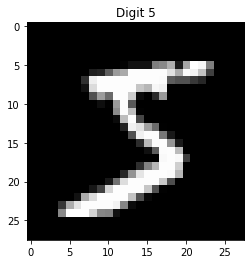

In [5]:
#################################################################################
#########                       check MNIST dataset                      ########
#################################################################################
# reshape the dataset for plotting
train_X_plot = train_X.reshape(-1, 28, 28)
# plot the digits
print(train_X_plot.shape)

plt.imshow(train_X_plot[0,:,:], cmap='gray')
plt.title("Digit {}".format(train_y[0]))

training set shape after filtering (12665, 784)
training set label shape after filtering (12665,)
testing set shape after filtering (2115, 784)
testing set label shape after filtering (2115,)
Before filtering [5 0 4 1 9 2 1 3 1 4 3 5 3 6 1 7 2 8 6 9]
After filtering [0 1 1 1 1 0 1 1 0 0 1 0 0 1 0 1 0 0 1 1]


Text(0.5, 1.0, 'binary set')

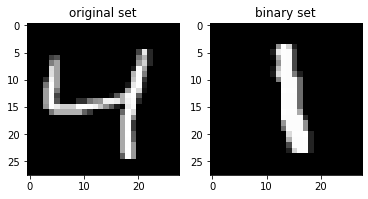

In [6]:
#################################################################################
#########                 extract subset of MNIST dataset                ########
#################################################################################
# extract subset of MNIST
# get all the images labelled "0" and "1" (binary filtering)
label_a = 0
label_b = 1
train_X_binary = train_X[(train_y == label_a) | (train_y == label_b),:]
train_y_binary = train_y[(train_y == label_a) | (train_y == label_b)]
test_X_binary = test_X[(test_y == label_a) | (test_y == label_b),:]
test_y_binary = test_y[(test_y == label_a) | (test_y == label_b)]
# check the results
print("training set shape after filtering", train_X_binary.shape)
print("training set label shape after filtering", train_y_binary.shape)
print("testing set shape after filtering", test_X_binary.shape)
print("testing set label shape after filtering", test_y_binary.shape)
print("Before filtering", train_y[:20])
print("After filtering", train_y_binary[:20])

# reshape the dataset for plotting
train_X_binary_plot = train_X_binary.reshape(-1, 28, 28)

fig = plt.figure()
plt.subplot(1,2,1)
plt.imshow(train_X_plot[2,:,:], cmap='gray')
plt.title("original set")
plt.subplot(1,2,2)
plt.imshow(train_X_binary_plot[2,:,:], cmap='gray')
plt.title("binary set")

In [7]:
#################################################################################
#########                  save the binary MNIST dataset                 ########
#################################################################################
np.savez_compressed(os.path.join(output_path,'binary-mnist.npz'),
X_train=train_X_binary, y_train=train_y_binary, X_test=test_X_binary, y_test=test_y_binary)

torch.Size([60000, 1, 28, 28])
torch.Size([60000])


Text(0.5, 1.0, 'Digit 5')

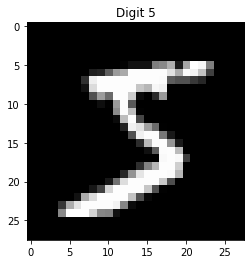

In [7]:
#################################################################################
#########        extract MNIST dataset with popular ML frameworks        ########
#################################################################################
# load MNIST using pytorch
import torch
import torchvision

batch_size_train = 60000
batch_size_test = 10000
# pytorch will search its MNIST folder for the data, otherwise it will start downloading
# we can fool this downloader by placing our local mnist dataset in its path ("/path/MNIST/raw")
train_data_torch = torchvision.datasets.MNIST(datapath, train=True, download=True,
                                              transform=torchvision.transforms.Compose([
                                              torchvision.transforms.ToTensor()]))
test_data_torch = torchvision.datasets.MNIST(datapath, train=False, download=True,
                                             transform=torchvision.transforms.Compose([
                                             torchvision.transforms.ToTensor()]))
# MNIST dataset is handled by dataloader in pytorch
train_data_loader = torch.utils.data.DataLoader(train_data_torch,
                                                batch_size=batch_size_train, shuffle=False)
test_data_loader = torch.utils.data.DataLoader(test_data_torch,
                                               batch_size=batch_size_test, shuffle=False)

train_X_y = enumerate(train_data_loader)
batch_idx, (train_X_torch, train_y_torch) = next(train_X_y)

# check the data
print(train_X_torch.shape)
print(train_y_torch.shape)

plt.imshow(train_X_torch[0,0,:,:], cmap='gray')
plt.title("Digit {}".format(train_y_torch[0]))

(60000, 28, 28)
(60000,)


Text(0.5, 1.0, 'Digit 5')

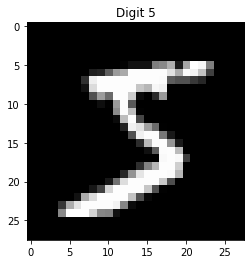

In [8]:
# load MNIST using tensorflow
import tensorflow as tf
# tensorflow will search its dataset folder for the data, otherwise it will start downloading
# we can fool this downloader by placing our local mnist dataset in its path ("~/.keras/datasets/")
# note that the MNIST loader from tensorflow can only read .npz file
mnist = tf.keras.datasets.mnist
(train_X_tf, train_y_tf), (test_X_tf, test_y_tf) = mnist.load_data()

# check the data
print(train_X_tf.shape)
print(train_y_tf.shape)

plt.imshow(train_X_tf[0,:,:], cmap='gray')
plt.title("Digit {}".format(train_y_tf[0]))